<a href="https://colab.research.google.com/github/Mubarok982/forecasting/blob/main/Univariate_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Import Library*

In [9]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

# **Load Library**

In [13]:
data = pd.read_csv("https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [14]:
data.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [15]:
dates = data['date'].values
temp = data['meantemp'].values

## **Membuat plot untuk melihat fluktuasi suhu**

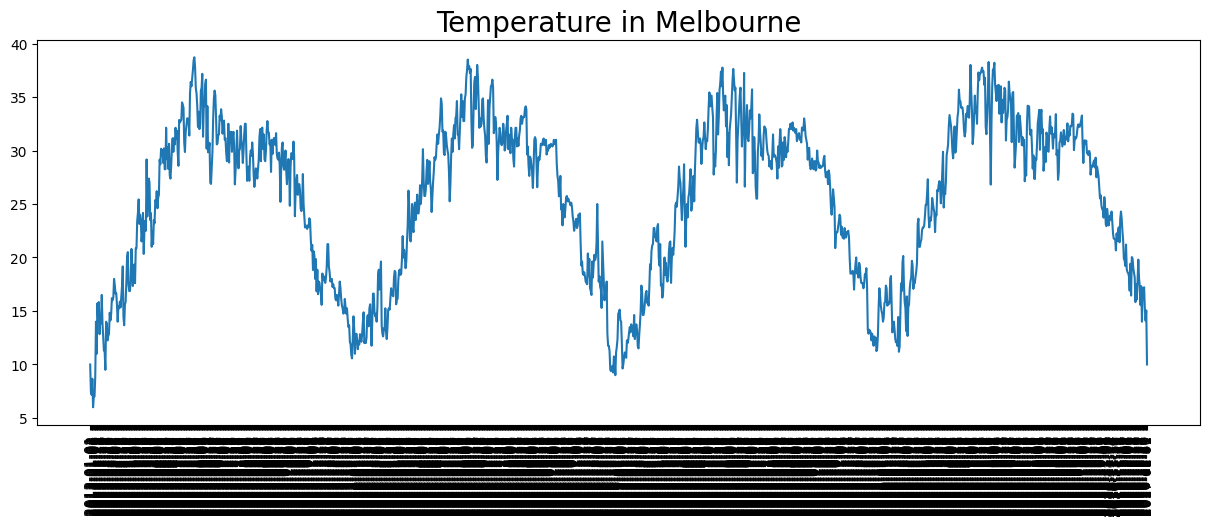

In [18]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature in Melbourne', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds =  ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [23]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 24.8602 - mae: 25.3602
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - loss: 24.7995 - mae: 25.2995
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 24.1092 - mae: 24.6092
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 23.9643 - mae: 24.4643
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 23.4147 - mae: 23.9147
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 22.9000 - mae: 23.4000
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 22.5095 - mae: 23.0095
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 21.5763 - mae: 22.0763
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 20.7472 - mae: 21.2472
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 19.7611 - mae: 20.2611
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 18.3387 - mae: 18.8387
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 16.4015 - mae: 16.9014
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 13.8309 - mae: 14.3280
Epoch 14/1

In [25]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([[22.959522],
       [16.836782],
       [31.644087],
       ...,
       [19.038784],
       [31.660263],
       [24.985928]], dtype=float32)